In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.optimize import curve_fit
from jupyterthemes import jtplot
jtplot.reset()

In [2]:
file = '../Data/data_opamp_all_projected_errx.txt'

data = pd.read_csv(file, sep = '\t', index_col = False, header = None)
data.index = np.arange(1, len(data)+1)
data.columns = ['Vin', 'Vout', 'errVin', 'errVout']

In [3]:
data

,Vin,Vout,errVin,errVout
1,-0.102,-0.972,0.002518,0.032167
2,-0.252,-2.480,0.005503,0.078157
3,-0.400,-3.920,0.010000,0.142035
4,-0.496,-4.960,0.010925,0.155719
5,-0.736,-7.360,0.013634,0.194331
6,-0.881,-8.980,0.018509,0.268298
7,-0.984,-10.000,0.019642,0.284251
8,-1.130,-11.500,0.022661,0.325324
9,-1.290,-13.000,0.026049,0.375125
10,0.106,0.997,0.002555,0.032368


In [4]:
data_min = data.iloc[:9, :]
data_max = data.iloc[9:, :]

In [5]:
data_min

,Vin,Vout,errVin,errVout
1,-0.102,-0.972,0.002518,0.032167
2,-0.252,-2.480,0.005503,0.078157
3,-0.400,-3.920,0.010000,0.142035
4,-0.496,-4.960,0.010925,0.155719
5,-0.736,-7.360,0.013634,0.194331
6,-0.881,-8.980,0.018509,0.268298
7,-0.984,-10.000,0.019642,0.284251
8,-1.130,-11.500,0.022661,0.325324
9,-1.290,-13.000,0.026049,0.375125


In [6]:
data_max.reset_index()
data_max

,Vin,Vout,errVin,errVout
10,0.106,0.997,0.002555,0.032368
11,0.252,2.480,0.005503,0.077640
12,0.400,4.000,0.010000,0.141599
13,0.496,4.960,0.010925,0.154696
14,0.744,7.440,0.013731,0.194432
15,0.907,8.980,0.018790,0.268558
16,1.010,9.930,0.019937,0.283955
17,1.160,11.400,0.022999,0.324818
18,1.290,13.000,0.026049,0.372709


In [7]:
# LINEAR FUCTION
def lin(x, a, b):
    return a + b * x

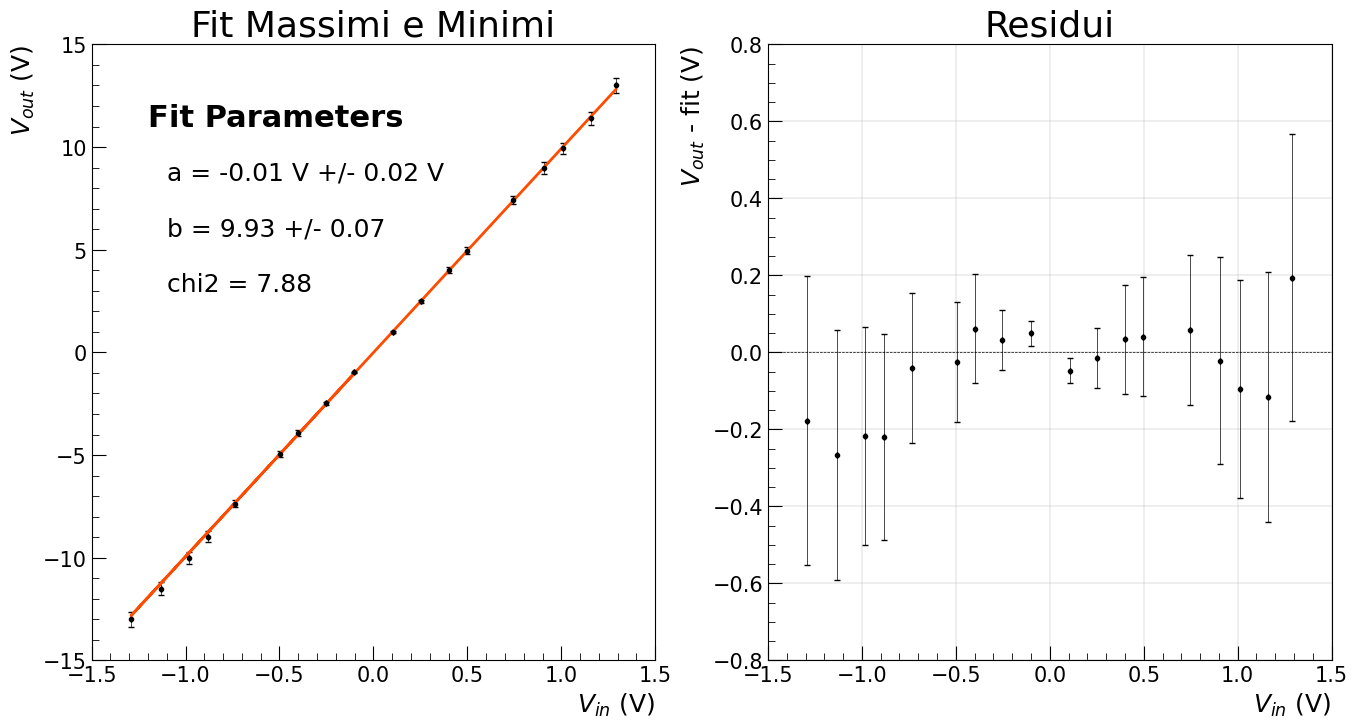

In [82]:
# FIG SETTINGS AND AXES
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
#ax1.grid(axis='both', linewidth = .3)
#ax2.grid(axis='both', linewidth = .3)

# PERFORM THE FIT
par_lin, cov_lin = curve_fit(f = lin, xdata = data.Vin, ydata = data.Vout, sigma = data.errVout, absolute_sigma = True)

# PLOT DATA
ax1.errorbar(data.Vin, data.Vout, xerr=0, yerr=data.errVout, marker = '.',
             elinewidth=0.5, color = '#000000', linewidth=0, capsize=2, label = 'Data')

# PLOT FIT FUNCTION
ax1.plot(data.Vin, lin(data.Vin, *par_lin), color = '#FF4B00', linewidth = 2, label = 'Fit')

# COMPUTE RESIDUALS
func = lin(data.Vin, *par_lin)
res = data.Vout - func

# COMPUTE CHI2
chi2 = np.sum((res/data.errVout)**2)

# DRAW DASHED 'ZERO' LINE
ax2.axhline(color = '#000000', linewidth = 0.5, linestyle = 'dashed')

# DRAW RESIDUALS
ax2.errorbar(data.Vin, res, xerr=0, yerr=data.errVout, marker = '.', elinewidth=0.5, color = '#000000', linewidth=0, capsize=2)

# GET FIT PARAMETERS AND PARAMETER ERRORS
error = []

for i in range(len(par_lin)):
    try:
        error.append(np.absolute(cov_lin[i][i])**0.5)
    except:
        error.append( 0.00 )

fit_par = par_lin
fit_err = np.array(error)

a = fit_par[0]
b = fit_par[1]
err_a = fit_err[0]
err_b = fit_err[1]

# PRINT FIT RESULTS
q = 'a = ' + format(a, '1.2f') + ' V +/- ' + format(err_a, '1.2f') + ' V'
m = 'b = ' + format(b, '1.2f') + ' +/- ' + format(err_b, '1.2f')
chisq = 'chi2 = ' + format(chi2, '1.2f')
ax1.text(-1.2, 11, 'Fit Parameters', fontsize = 22, fontweight = 'bold')
ax1.text(-1.1, 3, q + '\n' + '\n' + m + '\n' + '\n' + chisq, fontsize = 18)

# PLOT TITLE
ax1.set_title('Fit Massimi e Minimi', fontsize = 26)
ax2.set_title('Residui', fontsize = 26)

# AXIS LABELS
ax1.set_xlabel('$V_{in}$ (V)', fontsize = 18, loc = 'right')
ax1.set_ylabel('$V_{out}$ (V)', fontsize = 18, loc = 'top')
ax2.set_xlabel('$V_{in}$ (V)', fontsize = 18, loc = 'right')
ax2.set_ylabel('$V_{out}$ - fit (V)', fontsize = 18, loc = 'top')

# AXIS TICKS
ax1.tick_params(axis = 'both', which = 'major', labelsize = 15, direction = 'in', length = 10)
ax1.tick_params(axis = 'both', which = 'minor', labelsize = 15, direction = 'in', length = 5)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 15, direction = 'in', length = 10)
ax2.tick_params(axis = 'both', which = 'minor', labelsize = 15, direction = 'in', length = 5)
ax1.set_xticks(ticks = ax1.get_xticks(), minor = True)
ax2.set_xticks(ticks = ax2.get_xticks(), minor = True)
ax1.set_yticks(ticks = ax1.get_yticks(), minor = True)
ax2.set_yticks(ticks = ax2.get_yticks(), minor = True)
ax1.minorticks_on()
ax2.minorticks_on()

# PLOT RANGE
#ax1.set_xlim(left = -1.5, right = 1.5)
#ax1.set_ylim(bottom = -15, top = 15)

# MAKE LEGEND

#ax1.legend(loc = 'lower right', prop = {'size': 18})

# SAVE FIGURE
fig.savefig('../Plots/Report_Plots/opamp_all_py.png', dpi = 300)

plt.show()